In [102]:
import numpy as np,pandas as pd,sklearn, seaborn as sns

tdf = sns.load_dataset('titanic')

In [103]:
import warnings 
warnings.filterwarnings('ignore')

In [104]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [105]:
tdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
tdf.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [107]:
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

<Axes: xlabel='sex', ylabel='count'>

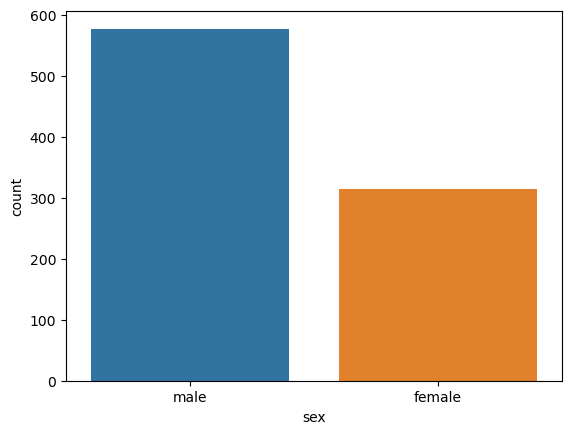

In [108]:
sns.countplot(x = "sex", data=tdf)

<Axes: xlabel='pclass', ylabel='count'>

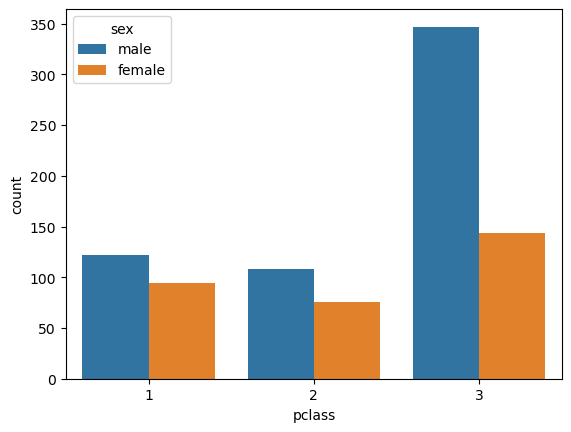

In [109]:
sns.countplot(x = "pclass", data=tdf, hue="sex")

<Axes: xlabel='who', ylabel='count'>

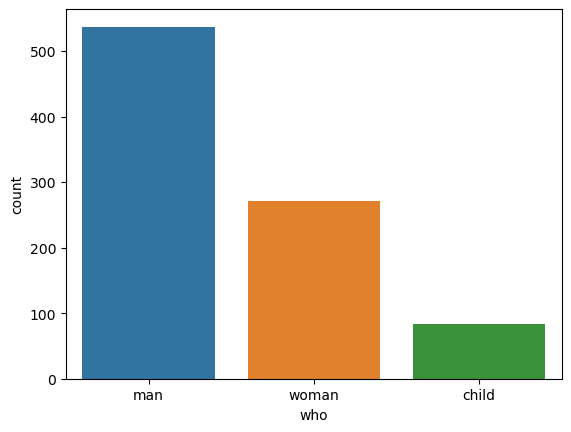

In [110]:
sns.countplot(x = "who", data=tdf)

<Axes: xlabel='class', ylabel='count'>

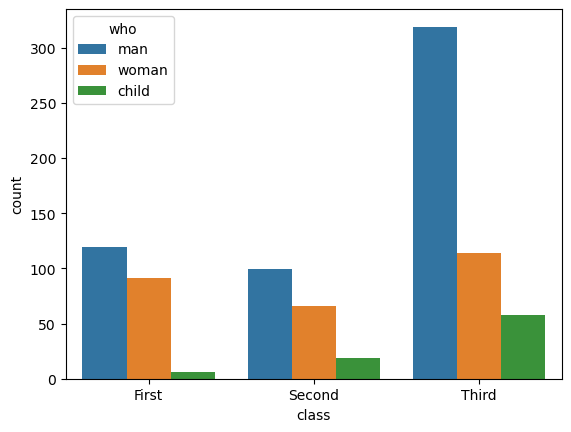

In [111]:
sns.countplot(x = "class", data=tdf, hue="who")

<Axes: xlabel='adult_male', ylabel='count'>

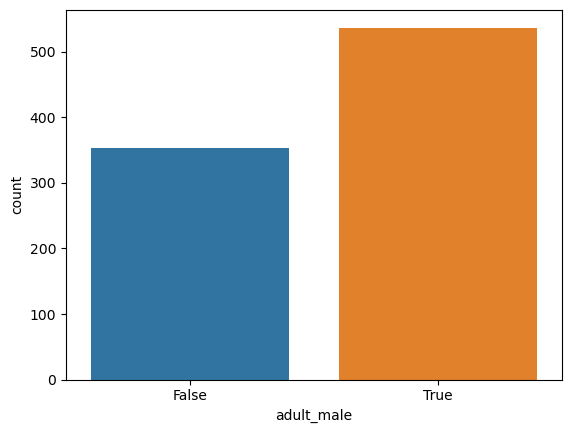

In [112]:
sns.countplot(x = "adult_male", data=tdf)

<Axes: xlabel='class', ylabel='count'>

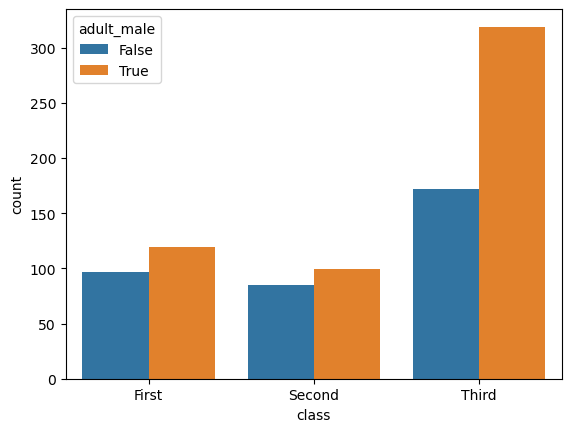

In [113]:
sns.countplot(x = "class", data=tdf, hue="adult_male")

<Axes: xlabel='class', ylabel='count'>

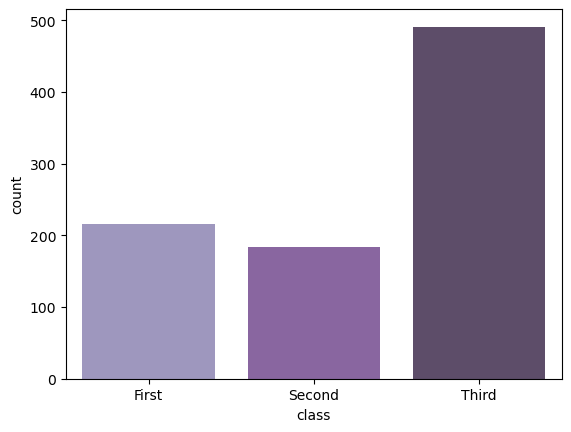

In [114]:
sns.countplot(x = "class", data=tdf, palette="BuPu_d")

In [115]:
df1, df2 = tdf.copy(), tdf.copy()

<Axes: xlabel='age', ylabel='Density'>

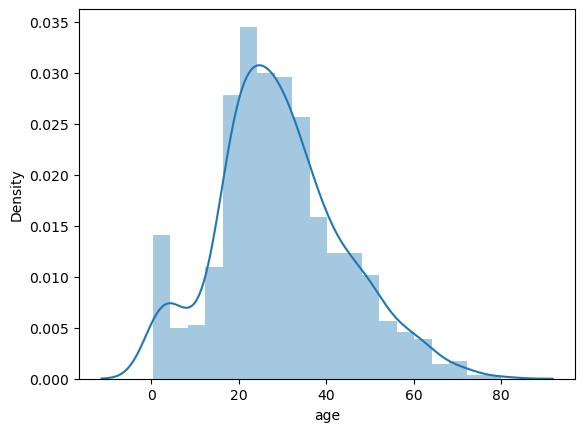

In [116]:
sns.distplot(tdf['age'], kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

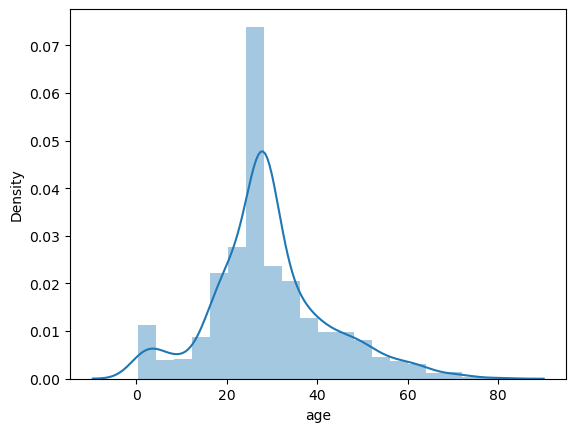

In [117]:
sns.distplot(tdf['age'].fillna(tdf['age'].median()), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

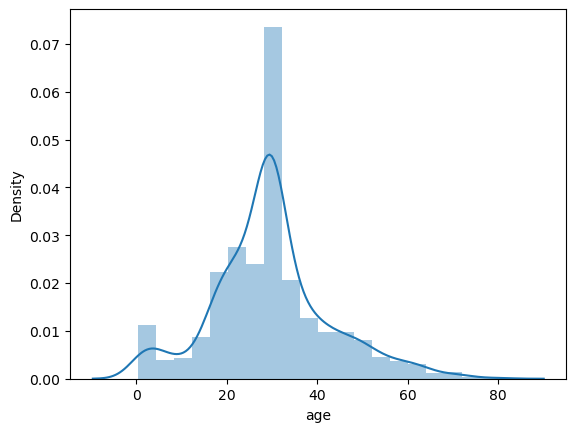

In [118]:
sns.distplot(tdf['age'].fillna(tdf['age'].mean()), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

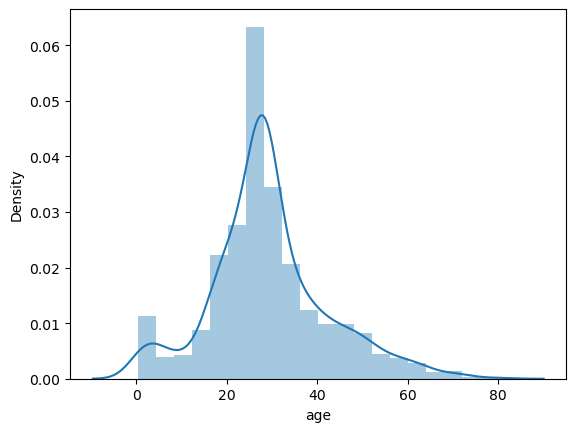

In [119]:
sns.distplot(tdf.groupby(['embarked'])['age'].transform(lambda x : x.fillna(x.median())), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

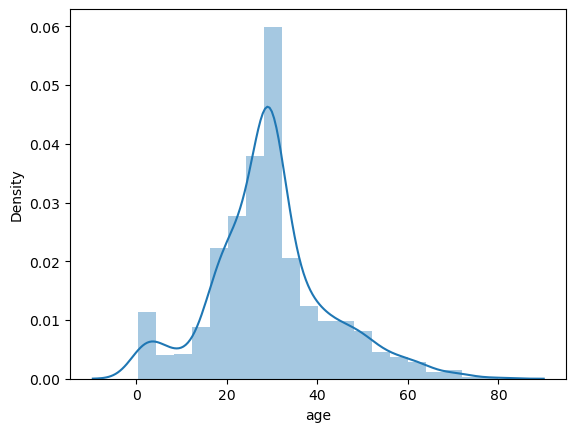

In [120]:
sns.distplot(tdf.groupby(['embarked'])['age'].transform(lambda x : x.fillna(x.mean())), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

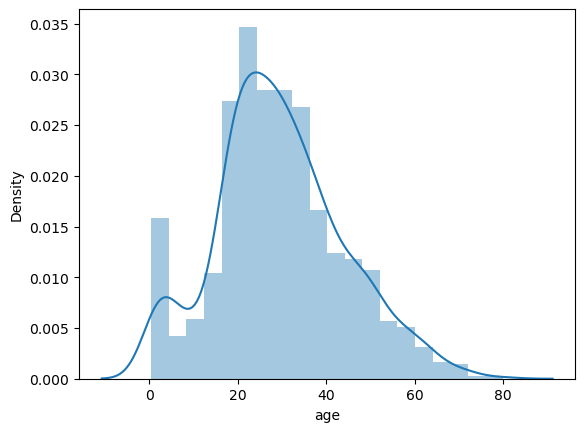

In [121]:
sns.distplot(tdf['age'].ffill().bfill(), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

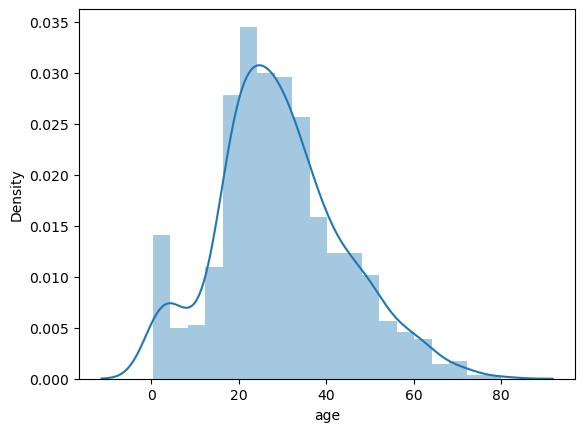

In [122]:
sns.distplot(tdf['age'].fillna(tdf['age'].mode()), kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

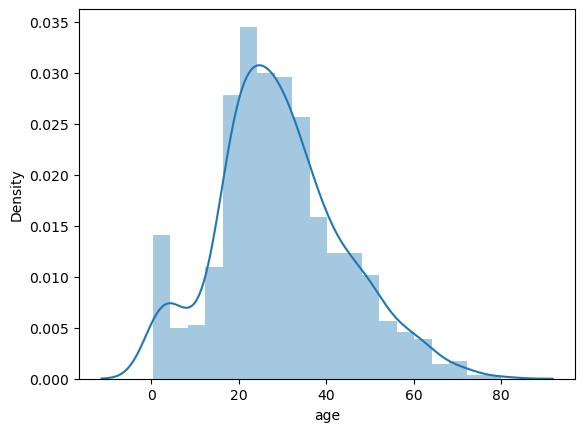

In [123]:
sns.distplot(tdf['age'], kde = True, hist = True, bins = 20)

<Axes: xlabel='age', ylabel='Density'>

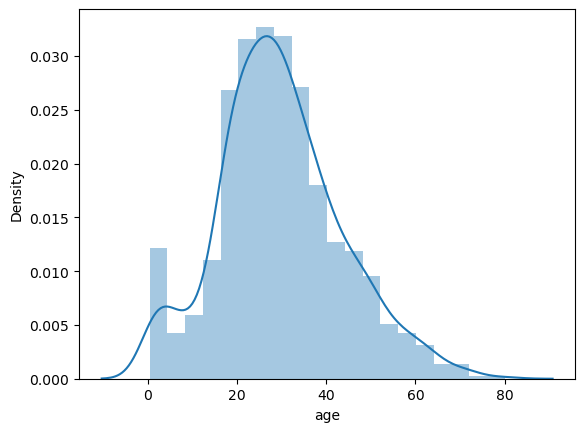

In [124]:
sns.distplot(tdf['age'].interpolate(method='linear'), kde = True, hist = True, bins = 20)

In [125]:
tdf['embarked']=tdf['embarked'].fillna(tdf['embarked'].mode())

<Axes: >

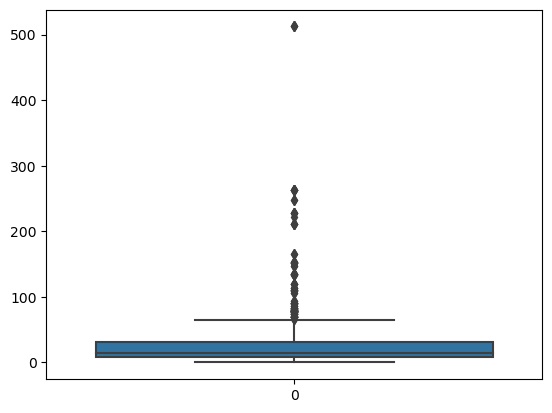

In [128]:
sns.boxplot(tdf['fare'])

In [126]:
def luFence(x):
    #x = x.sort()
    iqr = x.quantile(0.75) - x.quantile(0.25)
    lowerFence, upperFence = max(min(x), x.quantile(0.25)-1.5*iqr), min(max(x), x.quantile(0.75)+1.5*iqr)
    return lowerFence, upperFence

In [127]:
luFence(tdf['fare'])

(0.0, 65.6344)

In [129]:
outliers = (tdf['fare'] < 0.0) | (tdf['fare'] > 65.6344)

<Axes: xlabel='clipped_data_of_fare'>

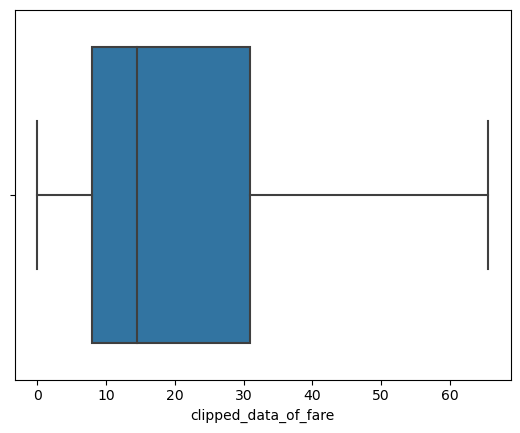

In [130]:
tdf['clipped_data_of_fare'] = tdf['fare'].clip(lower = 0.0, upper = 65.6344)
sns.boxplot(x='clipped_data_of_fare', data=tdf)

In [131]:
fare_mode = tdf['fare'].mode()
tdf.loc[outliers, 'fare'] = fare_mode

print("Number of outliers replaced:", outliers.sum())

Number of outliers replaced: 116
